# LSST Camera Sensor Annomalies: Figures

Author: Johnny Esteves, University Of Michigan


The figure 1 is deviation maps with flux, position, psf-size, shape.

In [1]:
cd ..

/Users/jesteves/Documents/GitHub/lsst-treeRing


In [2]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
plt.rc('image', interpolation='bicubic', origin='lower', cmap = 'viridis')
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['figure.figsize'] = [14.0, 10.0]
plt.rcParams['font.size'] = 16
rcParams = plt.rcParams.copy()

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
def saveFig(fig, fname, dpi=120):
    fig.savefig(fname, dpi=dpi, format='pdf', bbox_inches='tight')

In [14]:
import tree_ring_helper as tr
keys1 = {
        'flux':['abs','Flux-Ratio','perc. deviation [\%]', 100.],
        'psf-size':['abs','PSF-Size: $\delta T = \delta I_{xx}+ \delta I_{yy}$','perc. deviation [\%]',100.],
        'pos-x':['x','Position: $\delta x$','[pixels]',1.],
        'pos-y':['y','Position: $\delta y$','[pixels]',1.],
        'shape-x':['x','Shape: $\delta e_2$','perc. deviation [\%]',100.],
        'shape-y':['y','Shape: $\delta e_1$','perc. deviation [\%]',100.],
       }

def component_map(shortcut):
    res = {
           'flux':'flux-ratio','psf-size':'psf-size',
           'pos-x':'astrometric-shift','pos-y':'astrometric-shift',
           'shape-x':'ellipticity','shape-y':'ellipticity',
          }
    return res[shortcut]

## Load Data

Retrieve the output measurements from the spotgrid detector code, ```mixcoatl```.


### Mixcoatl output

<b> Updates since raft9 data </b>:

<li> correction for shaking on the z-direction of the xy-motor plataform </li>
<li> new distortion map imaging functionality </li>    
<li> compute ellipticities based on the second moments </li>
<li> transform the vectors to tree ring coordinates </li>

The respective functions are: <br>
```sensor.correct_shaking()``` <br>
```sensor.get_imaging_map()``` <br>
```sensor.compute_ellipticities()``` <br>
```sensor.transform_to_treeRing_coords()``` <br>


In [5]:
import os

tmp_file = './tmp/Figure1.pkl'
is_local_file = os.path.isfile(tmp_file)

In [6]:
import pickle
if is_local_file:
    figure1 = pickle.load(open(tmp_file, "rb"))
    print('Local file loaded succsefuly: %s' % tmp_file)
    print('Please skip the load section')
else:
    print('Local file not found: %s' % tmp_file)
    print('Run the following 1.2 section, it might take some time')

You are not connected to a LSST machine
Fake Bluter
Local file loaded succsefuly: ./tmp/Figure1.pkl
Please skip the load section


### Run Only Once

In [4]:
from spotgrid_butler_new import SpotgridCatalog

repo25 = '/sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml'
repo9 = '/sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/butler.yaml'

setting = [
    (repo25, 'u/snyder18/spot_13242/gridfit_run1', 'u/snyder18/spot_13242/gridcalibration'),
    (repo25, 'u/snyder18/spot_13243/gridfit_run1', 'u/snyder18/spot_13243/gridcalibration'),
    (repo25, 'u/snyder18/spot_13237/gridfit_run1', 'u/snyder18/spot_13237/gridcalibration'),
    (repo25, 'u/snyder18/spot_13246/gridfit_run1', 'u/snyder18/spot_13246/gridcalibration'),
    (repo9, 'u/asnyder/spot/e2v_analysis', 'u/asnyder/spot/e2v_calibration'),        
    (repo9, 'u/asnyder/spot/itl_analysis', 'u/asnyder/spot/itl_calibration')]


You are not connected to a LSST machine
Fake Bluter


In [5]:
if not is_local_file:
    # sensors
    sensors = []
    for mysetting in setting:
        sensor = SpotgridCatalog(*mysetting)

        #asensor.get_calibration_table()
        sensor.load_data()
        sensor.correct_shaking()
        sensor.compute_statistics()
        sensor.filter_spots(value=.4)   # value=.4
        sensor.compute_spotgrid()
        sensor.calibrate()

        # new functions
        sensor.compute_ellipticities()
        sensor.get_imaging_map()    
        sensor.transform_to_treeRing_coords()

        sensors.append(sensor)

repo: /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml
--------------------------------------------------
Repository        : /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml
catalog collection: u/snyder18/spot_13242/gridfit_run1
calib collection  : u/snyder18/spot_13242/gridcalibration
Found tmp/R03_S12_x_arr.npy
Found tmp/R03_S12_y_arr.npy
Found tmp/R03_S12_xx_arr.npy
Found tmp/R03_S12_xy_arr.npy
Found tmp/R03_S12_yy_arr.npy
Found tmp/R03_S12_dx_arr.npy
Found tmp/R03_S12_dy_arr.npy
Found tmp/R03_S12_dxx_arr.npy
Found tmp/R03_S12_dyy_arr.npy
Found tmp/R03_S12_dxy_arr.npy
Found tmp/R03_S12_instFlux_arr.npy
Found tmp/R03_S12_instFluxErr_arr.npy
Found tmp/R03_S12_x_center_arr.npy
Found tmp/R03_S12_y_center_arr.npy
Found tmp/R03_S12_dFlux_arr.npy
Found tmp/R03_S12_dg1_arr.npy
Found tmp/R03_S12_dg2_arr.npy
Loading data for ITL tmp/R03_S12.


Computing statistics for ITL tmp/R03_S12.


/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:340: RuntimeWarning: Mean of empty slice
  self.dxx_mean = np.nanmean(self.dxx_arr, axis=1)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:344: RuntimeWarning: Mean of empty slice
  self.dyy_mean = np.nanmean(self.dyy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:348: RuntimeWarning: Mean of empty slice
  self.dxy_mean = np.nanmean(self.dxy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:357: RuntimeWarning: Mean of empty slic

Computing filter spots for ITL tmp/R03_S12.
repo: /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml
--------------------------------------------------
Repository        : /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml
catalog collection: u/snyder18/spot_13243/gridfit_run1
calib collection  : u/snyder18/spot_13243/gridcalibration
Found tmp/R10_S11_x_arr.npy
Found tmp/R10_S11_y_arr.npy
Found tmp/R10_S11_xx_arr.npy
Found tmp/R10_S11_xy_arr.npy
Found tmp/R10_S11_yy_arr.npy
Found tmp/R10_S11_dx_arr.npy
Found tmp/R10_S11_dy_arr.npy
Found tmp/R10_S11_dxx_arr.npy
Found tmp/R10_S11_dyy_arr.npy
Found tmp/R10_S11_dxy_arr.npy
Found tmp/R10_S11_instFlux_arr.npy
Found tmp/R10_S11_instFluxErr_arr.npy
Found tmp/R10_S11_x_center_arr.npy
Found tmp/R10_S11_y_center_arr.npy
Found tmp/R10_S11_dFlux_arr.npy
Found tmp/R10_S11_dg1_arr.npy
Found tmp/R10_S11_dg2_arr.npy
Loading data for ITL tmp/R10_S11.


Computing statistics for ITL tmp/R10_S11.


/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:340: RuntimeWarning: Mean of empty slice
  self.dxx_mean = np.nanmean(self.dxx_arr, axis=1)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:344: RuntimeWarning: Mean of empty slice
  self.dyy_mean = np.nanmean(self.dyy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:348: RuntimeWarning: Mean of empty slice
  self.dxy_mean = np.nanmean(self.dxy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:357: RuntimeWarning: Mean of empty slic

Computing filter spots for ITL tmp/R10_S11.
repo: /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml
--------------------------------------------------
Repository        : /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml
catalog collection: u/snyder18/spot_13237/gridfit_run1
calib collection  : u/snyder18/spot_13237/gridcalibration
Found tmp/R24_S11_x_arr.npy
Found tmp/R24_S11_y_arr.npy
Found tmp/R24_S11_xx_arr.npy
Found tmp/R24_S11_xy_arr.npy
Found tmp/R24_S11_yy_arr.npy
Found tmp/R24_S11_dx_arr.npy
Found tmp/R24_S11_dy_arr.npy
Found tmp/R24_S11_dxx_arr.npy
Found tmp/R24_S11_dyy_arr.npy
Found tmp/R24_S11_dxy_arr.npy
Found tmp/R24_S11_instFlux_arr.npy
Found tmp/R24_S11_instFluxErr_arr.npy
Found tmp/R24_S11_x_center_arr.npy
Found tmp/R24_S11_y_center_arr.npy
Found tmp/R24_S11_dFlux_arr.npy
Found tmp/R24_S11_dg1_arr.npy
Found tmp/R24_S11_dg2_arr.npy
Loading data for e2v tmp/R24_S11.


Computing statistics for e2v tmp/R24_S11.


/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:340: RuntimeWarning: Mean of empty slice
  self.dxx_mean = np.nanmean(self.dxx_arr, axis=1)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:344: RuntimeWarning: Mean of empty slice
  self.dyy_mean = np.nanmean(self.dyy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:348: RuntimeWarning: Mean of empty slice
  self.dxy_mean = np.nanmean(self.dxy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:357: RuntimeWarning: Mean of empty slic

Computing filter spots for e2v tmp/R24_S11.
repo: /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml
--------------------------------------------------
Repository        : /sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml
catalog collection: u/snyder18/spot_13246/gridfit_run1
calib collection  : u/snyder18/spot_13246/gridcalibration
Found tmp/R32_S01_x_arr.npy
Found tmp/R32_S01_y_arr.npy
Found tmp/R32_S01_xx_arr.npy
Found tmp/R32_S01_xy_arr.npy
Found tmp/R32_S01_yy_arr.npy
Found tmp/R32_S01_dx_arr.npy
Found tmp/R32_S01_dy_arr.npy
Found tmp/R32_S01_dxx_arr.npy
Found tmp/R32_S01_dyy_arr.npy
Found tmp/R32_S01_dxy_arr.npy
Found tmp/R32_S01_instFlux_arr.npy
Found tmp/R32_S01_instFluxErr_arr.npy
Found tmp/R32_S01_x_center_arr.npy
Found tmp/R32_S01_y_center_arr.npy
Found tmp/R32_S01_dFlux_arr.npy
Found tmp/R32_S01_dg1_arr.npy
Found tmp/R32_S01_dg2_arr.npy
Loading data for e2v tmp/R32_S01.


Computing statistics for e2v tmp/R32_S01.


/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:340: RuntimeWarning: Mean of empty slice
  self.dxx_mean = np.nanmean(self.dxx_arr, axis=1)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:344: RuntimeWarning: Mean of empty slice
  self.dyy_mean = np.nanmean(self.dyy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:348: RuntimeWarning: Mean of empty slice
  self.dxy_mean = np.nanmean(self.dxy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:357: RuntimeWarning: Mean of empty slic

Computing filter spots for e2v tmp/R32_S01.
repo: /sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/butler.yaml
--------------------------------------------------
Repository        : /sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/butler.yaml
catalog collection: u/asnyder/spot/e2v_analysis
calib collection  : u/asnyder/spot/e2v_calibration
Found tmp/R22_S11_x_arr.npy
Found tmp/R22_S11_y_arr.npy
Found tmp/R22_S11_xx_arr.npy
Found tmp/R22_S11_xy_arr.npy
Found tmp/R22_S11_yy_arr.npy
Found tmp/R22_S11_dx_arr.npy
Found tmp/R22_S11_dy_arr.npy
Found tmp/R22_S11_dxx_arr.npy
Found tmp/R22_S11_dyy_arr.npy
Found tmp/R22_S11_dxy_arr.npy
Found tmp/R22_S11_instFlux_arr.npy
Found tmp/R22_S11_instFluxErr_arr.npy
Found tmp/R22_S11_x_center_arr.npy
Found tmp/R22_S11_y_center_arr.npy
Found tmp/R22_S11_dFlux_arr.npy
Found tmp/R22_S11_dg1_arr.npy
Found tmp/R22_S11_dg2_arr.npy
Loading data for e2v tmp/R22_S11.


Computing statistics for e2v tmp/R22_S11.


/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:340: RuntimeWarning: Mean of empty slice
  self.dxx_mean = np.nanmean(self.dxx_arr, axis=1)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:344: RuntimeWarning: Mean of empty slice
  self.dyy_mean = np.nanmean(self.dyy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:348: RuntimeWarning: Mean of empty slice
  self.dxy_mean = np.nanmean(self.dxy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:357: RuntimeWarning: Mean of empty slic

Computing filter spots for e2v tmp/R22_S11.
repo: /sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/butler.yaml
--------------------------------------------------
Repository        : /sdf/group/lsst/camera/IandT/repo_gen3/spot_9raft/butler.yaml
catalog collection: u/asnyder/spot/itl_analysis
calib collection  : u/asnyder/spot/itl_calibration
Found tmp/R02_S02_x_arr.npy
Found tmp/R02_S02_y_arr.npy
Found tmp/R02_S02_xx_arr.npy
Found tmp/R02_S02_xy_arr.npy
Found tmp/R02_S02_yy_arr.npy
Found tmp/R02_S02_dx_arr.npy
Found tmp/R02_S02_dy_arr.npy
Found tmp/R02_S02_dxx_arr.npy
Found tmp/R02_S02_dyy_arr.npy
Found tmp/R02_S02_dxy_arr.npy
Found tmp/R02_S02_instFlux_arr.npy
Found tmp/R02_S02_instFluxErr_arr.npy
Found tmp/R02_S02_x_center_arr.npy
Found tmp/R02_S02_y_center_arr.npy
Found tmp/R02_S02_dFlux_arr.npy
Found tmp/R02_S02_dg1_arr.npy
Found tmp/R02_S02_dg2_arr.npy
Loading data for ITL tmp/R02_S02.


Computing statistics for ITL tmp/R02_S02.


/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:340: RuntimeWarning: Mean of empty slice
  self.dxx_mean = np.nanmean(self.dxx_arr, axis=1)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/jesteves/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:344: RuntimeWarning: Mean of empty slice
  self.dyy_mean = np.nanmean(self.dyy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:348: RuntimeWarning: Mean of empty slice
  self.dxy_mean = np.nanmean(self.dxy_arr, axis=1)
/Users/jesteves/Documents/GitHub/lsst-treeRing/spotgrid_butler_new.py:357: RuntimeWarning: Mean of empty slic

Computing filter spots for ITL tmp/R02_S02.


In [ ]:
# # IT MAY TAKE SOME TIME TO RUN THIS CELL
if not is_local_file:
    ### Create Images
    figure1 = {}

    for variable in keys1.keys():
        print('Variable: %s'%variable)
        component = keys1[variable][0]
        ylabel = keys1[variable][1]
        strech = keys1[variable][3]
        rings = []

        for sensor in sensors:
            print('Sensor Bay: %s'%(sensor.sensorbay))
            ring = tr.tree_ring_tools(sensor)
            ring.make_image(component_map(variable), component, fradius=None)

            ring.apply_strech(strech)
            ring.img = ring._resize(ring.img)
            #ring.apply_high_freq_filter(use_zero=False)
            #ring.apply_gaussian_filter(downscale=4)
            #ring.apply_mask()

            #ring.make_polar_transformation(theta_cut=[100, 250])
            #ring.compute_signal()
            #ring.make_profile(ring.diff2,step=1)
            #ring.save_profile(variable)
            rings.append(ring)
            print('\n')
        figure1[variable] = rings

In [ ]:
## save locally
if not is_local_file:
    pickle.dump(figure1, open(tmp_file, "wb"))  # save it into a file named save.p    
    print('File saved locally: %s'%tmp_file)
    

If the correction_shaking function is not applied the results are not correct.


## Distortion Maps

In [15]:
def imshow(image,axes,title='',show_colorbar=False,levels=[-0.015,0.015]):
    im0 = axes.imshow(image,origin='lower',vmin=levels[0],vmax=levels[1], cmap='viridis')
    axes.tick_params(axis='x', labelsize=12)
    axes.tick_params(axis='y', labelsize=12)
    axes.set_aspect('equal')
    axes.set_title(title)
    if show_colorbar: return im0

In [40]:
import datetime
from matplotlib.backends.backend_pdf import PdfPages

def make_plot_figure1(ix, highPassFilter=False):
    fig, axes = plt.subplots(2, 3, figsize=(14, 8))
    #axes = axes.flatten()
    
    variables = ['flux','pos-x','shape-y',
                 'psf-size','pos-y','shape-x']
    count=0
    for i in range(2):
        for j in range(3):
            variable = variables[count]
            rings = figure1[variable]
            ring = rings[ix]
            if not highPassFilter:
                img = ring.img.copy()
            else:
                img = ring.diff
            
            #if variable=='flux':
                #img = np.log10(img/100) # mmag
                #img -= np.nanmedian(img)
                                
            l1, l2 = get_lim_img(img)
            im = imshow(ring.img, axes[i,j],title=keys1[variable][1],
                        levels=[l1,l2],show_colorbar=True)
            
            if i>0:
                axes[i,j].set_xlabel('X position [pixels]', fontsize=15)
            if j==0:
                axes[i,j].set_ylabel('Y position [pixels]', fontsize=15)

    
            fig.colorbar(im, ax=axes[i,j], shrink=0.9).set_label(keys1[variable][2])    
            fig.suptitle(f'{ring.sensor.upper()} Sensor - {ring.sensorbay}')
            count+=1
            
    fig.tight_layout()
    return fig
        
def get_lim_img(x):
    xflat = x.flatten()
    lo, up = np.nanpercentile(xflat, [8, 92])
    return lo, up

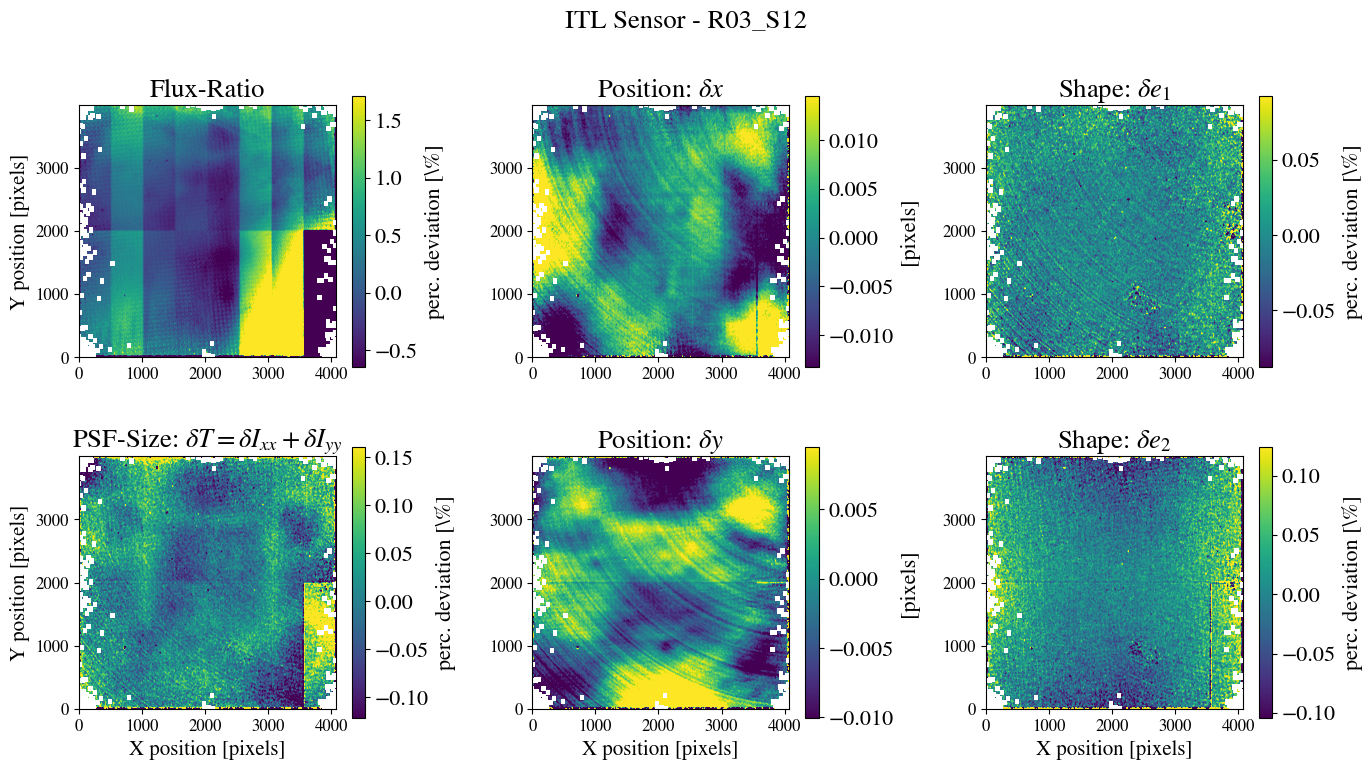

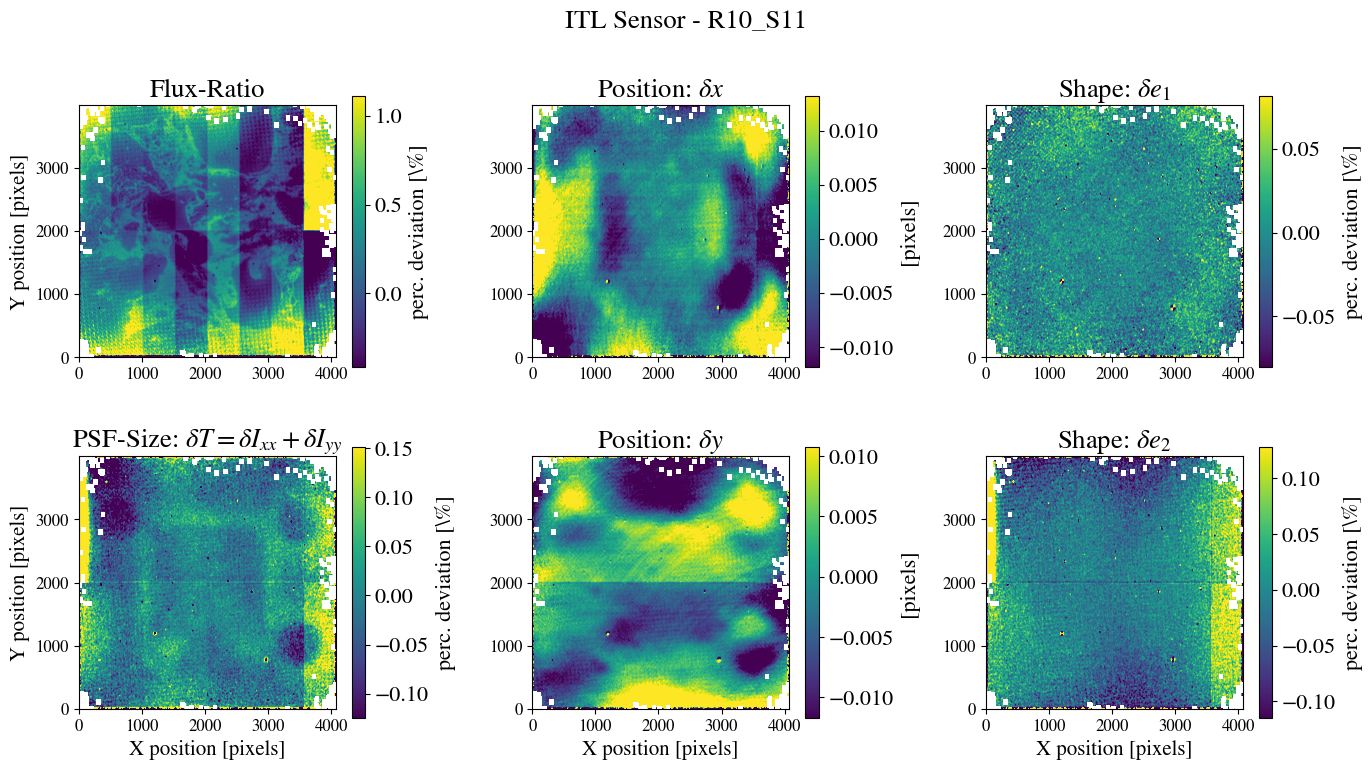

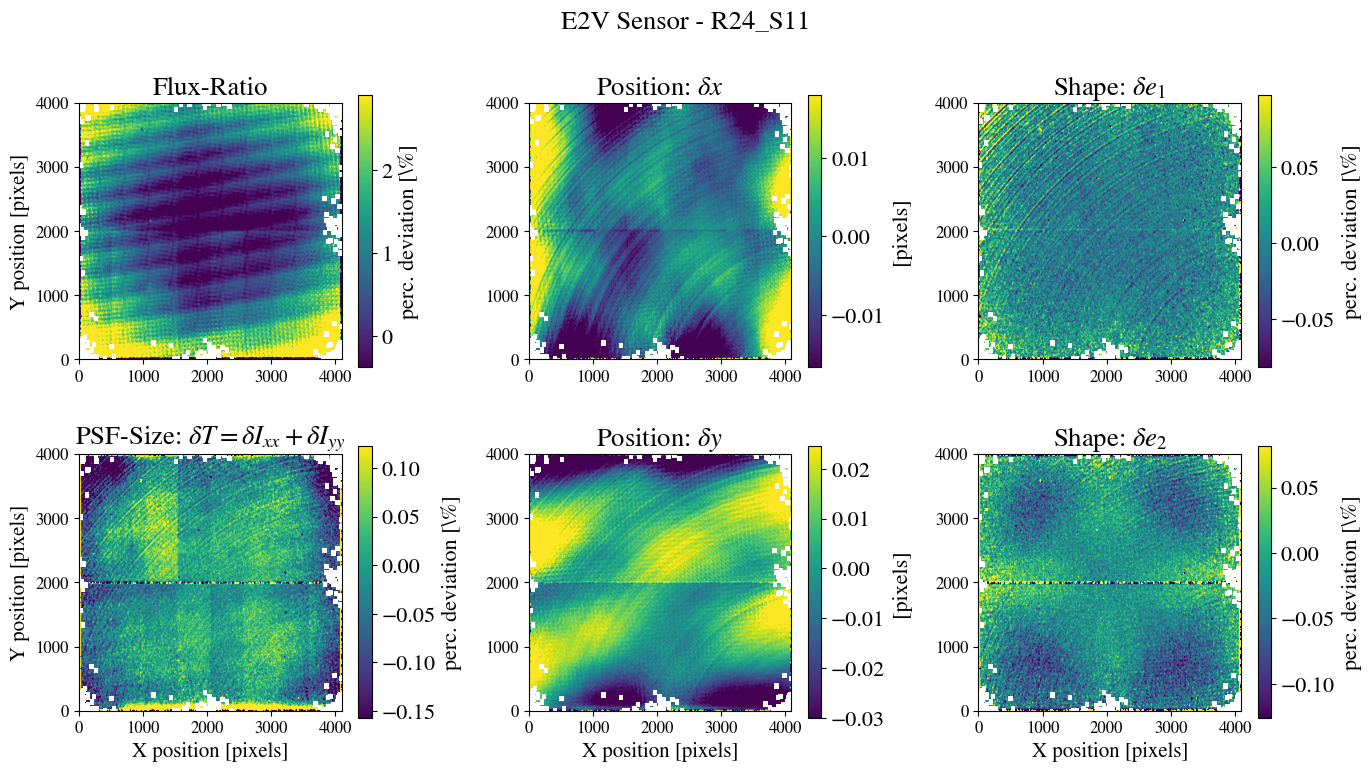

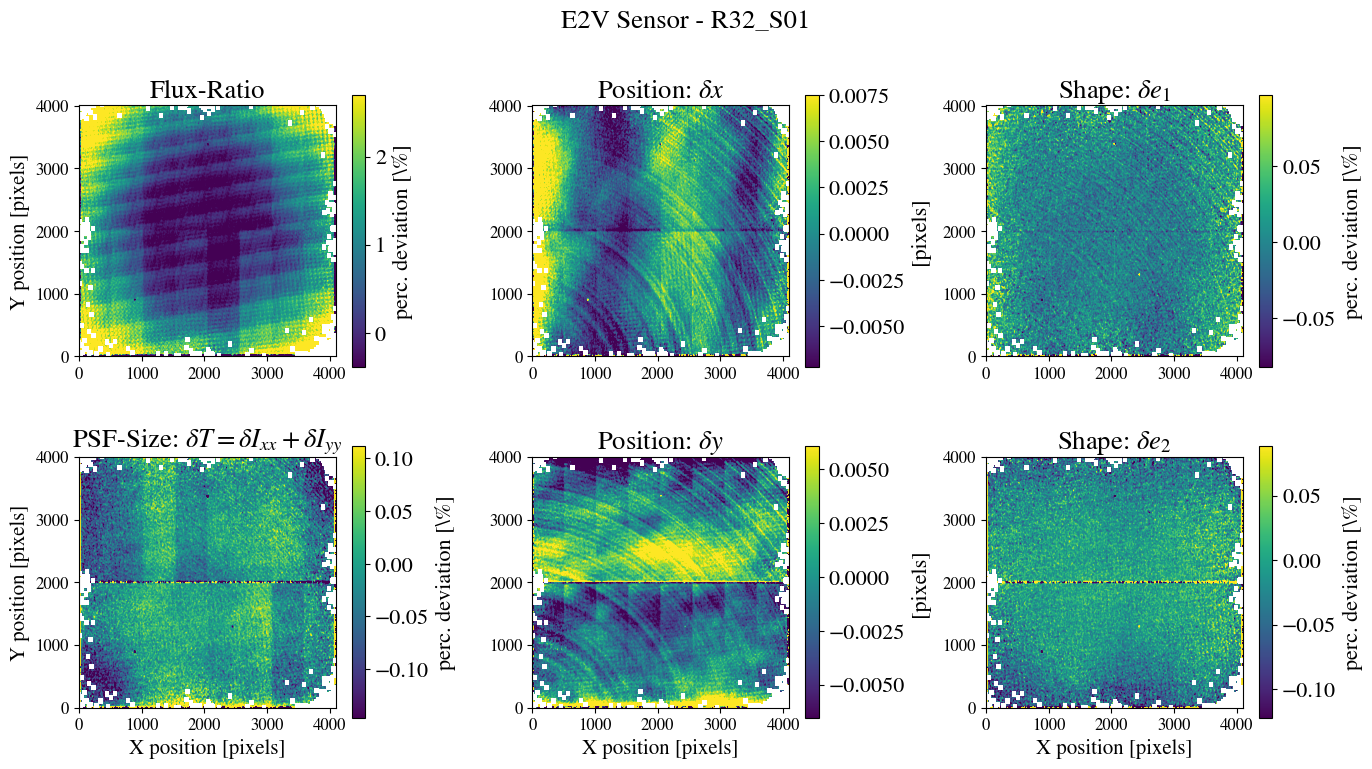

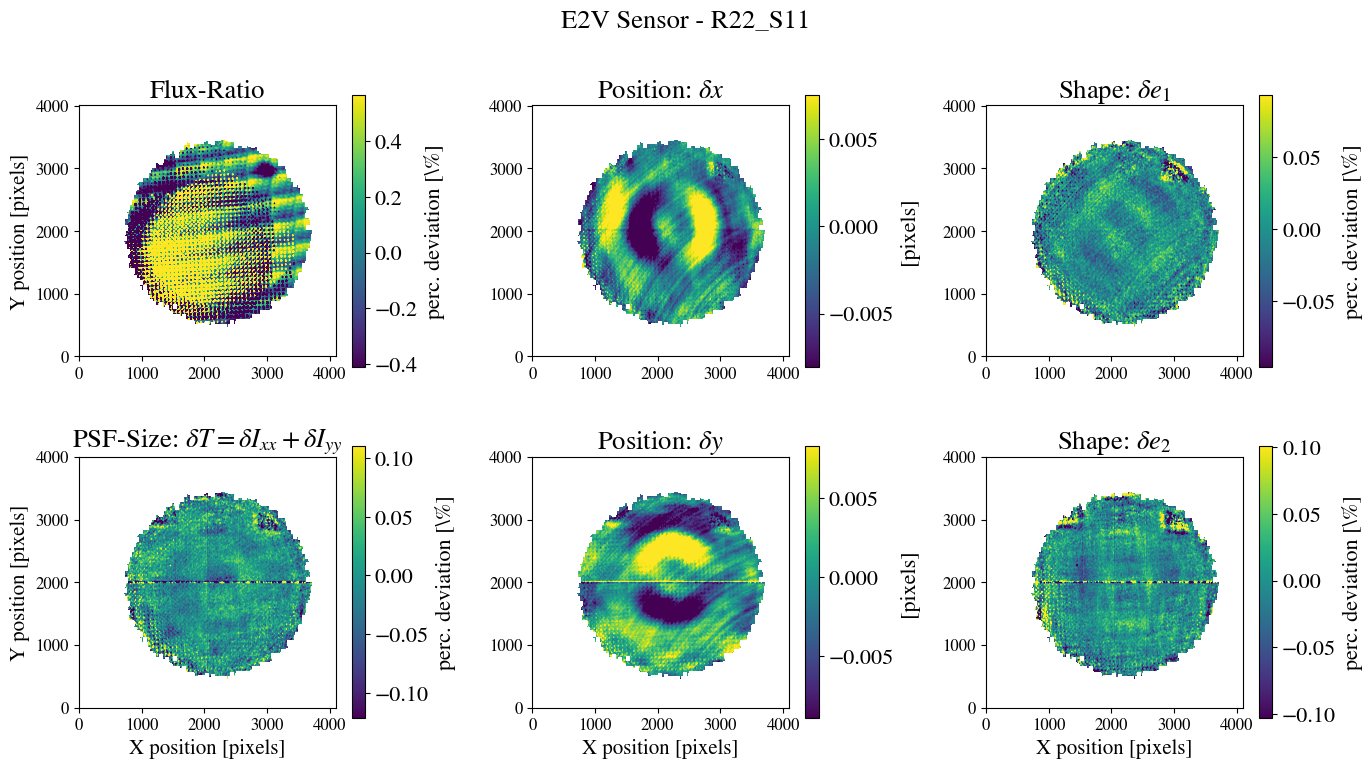

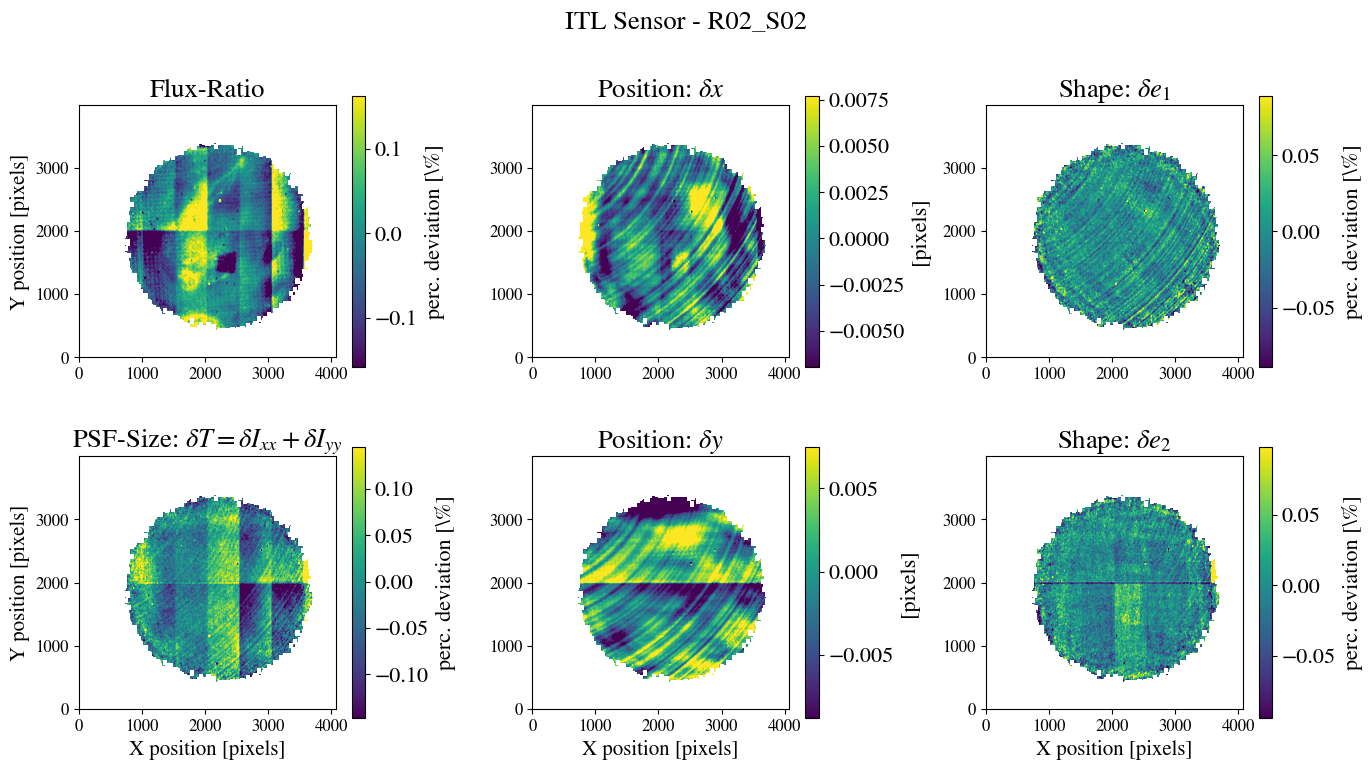

In [41]:
## plot square
with PdfPages('./figures/Figure1.pdf') as pdf:
    for ix in range(len(figure1['flux'])):
        make_plot_figure1(ix)
        pdf.savefig()
        
# saveFig(fig, './figures/Figure1')

I choose two figures as an example for each sensor.

You are not connected to a LSST machine
Fake Bluter


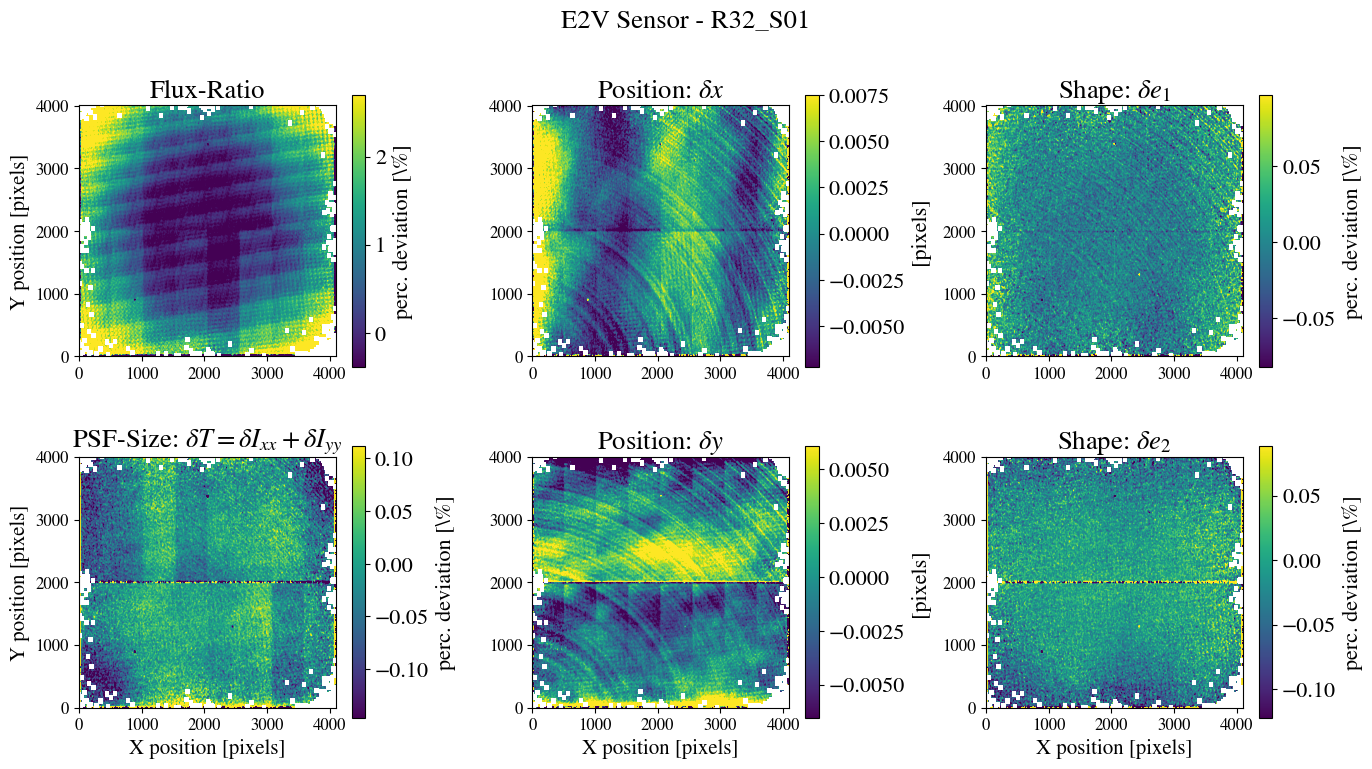

In [42]:
fig = make_plot_figure1(3)
saveFig(fig, './figures/Figure1_a.pdf')

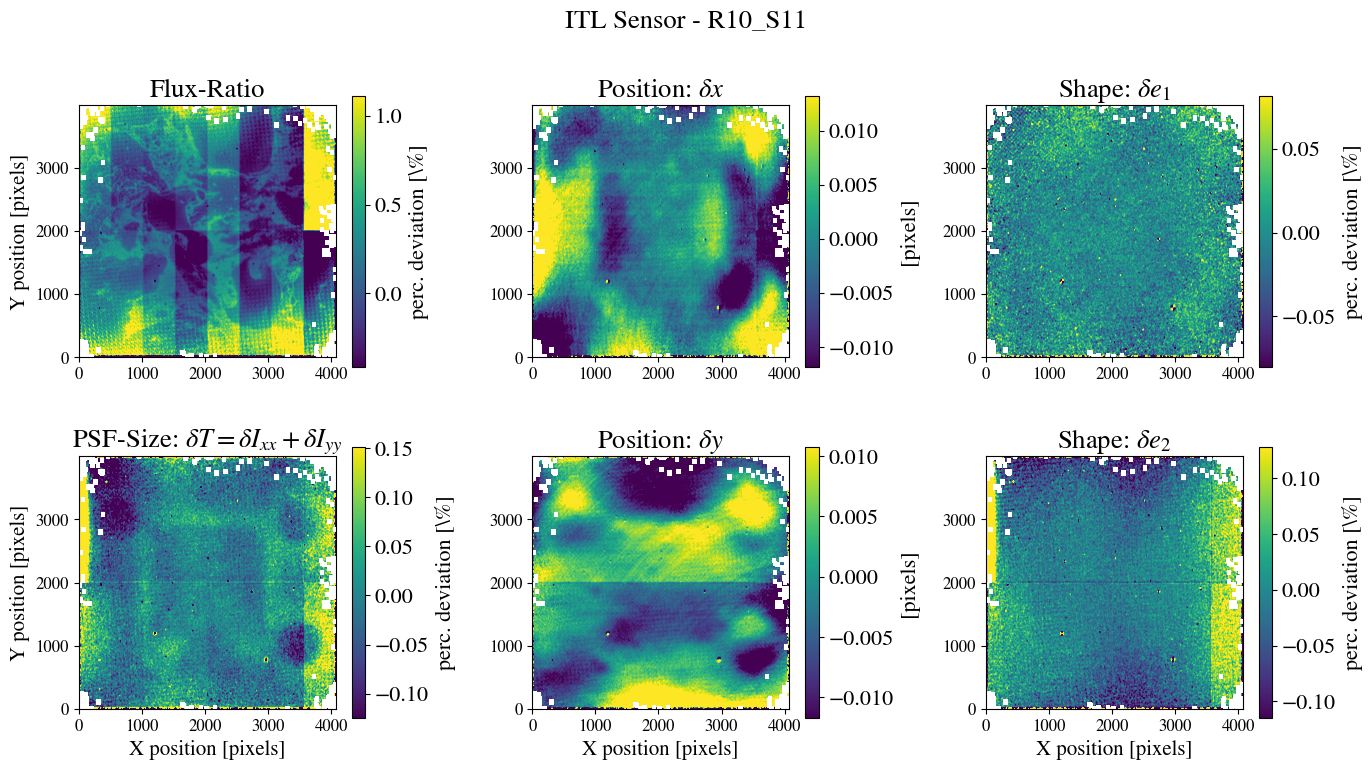

In [43]:
fig = make_plot_figure1(1)
saveFig(fig, './figures/Figure1_b.pdf')

(array([3.70000e+02, 1.80000e+02, 2.80000e+02, 2.20000e+02, 1.27000e+03,
        1.08000e+03, 3.07000e+03, 1.11800e+04, 4.82000e+04, 1.61208e+07]),
 array([-217.31633182, -194.80650659, -172.29668137, -149.78685615,
        -127.27703093, -104.76720571,  -82.25738048,  -59.74755526,
         -37.23773004,  -14.72790482,    7.7819204 ]),
 <BarContainer object of 10 artists>)

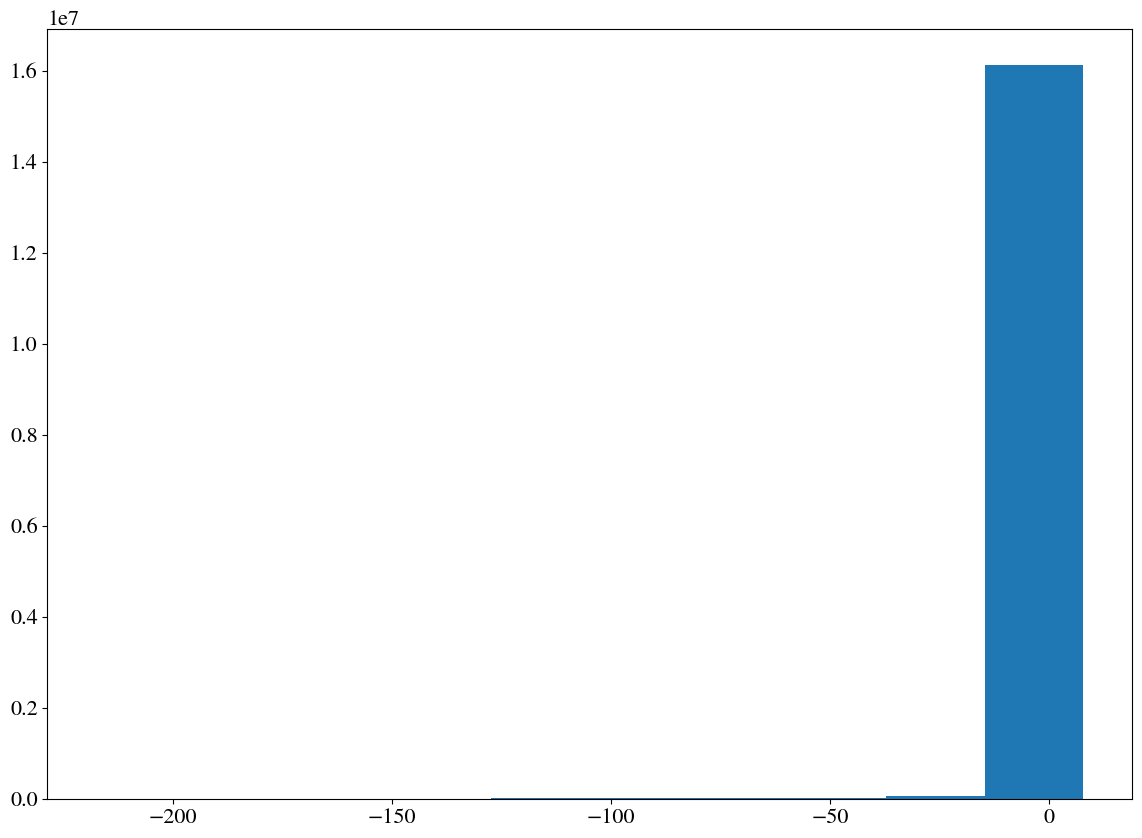

In [39]:
plt.hist(figure1['flux'][0].img)